# Labour Party Conference speeches through the years

## Data preparation

We can use the existing `speeches_df.csv` file to trace changes in Labour leaders' speeches over time:

In [1]:
import pandas as pd
from pathlib import Path
path = Path().cwd()
speeches_df = pd.read_csv(path / "speeches_df.csv")
labour_df = speeches_df[speeches_df["party"] == "Labour"]
display(labour_df)

,title,speaker,location,tags,commentary,content,party,year
1,"Leader's speech, Manchester 2006",Tony Blair,Manchester,NaN,This conference speech was Blairâs last as ...,I’d like to start by saying something very sim...,Labour,2006.0
152,"Leader's speech, London 1924",J. Ramsay MacDonald,London,NaN,"On 22 January 1924, Labour formed a Minority ...","Last year, that optimistic prophet and calcula...",Labour,1924.0
153,"Leader's speech, Bournemouth 1946",Clement Attlee,Bournemouth,NaN,\r\n \r\n \r\n \r\n,I have heard many Parliamentary Reports moved ...,Labour,1946.0
154,"Leader's speech, Margate 1947",Clement Attlee,Margate,NaN,\r\n \r\n,It is twenty-two months almost to a day since ...,Labour,1947.0
155,"Leader's speech, Scarborough 1948",Clement Attlee,Scarborough,NaN,"Since its last conference, Labour had nationa...",This records the activi­ties of the third year...,Labour,1948.0
...,...,...,...,...,...,...,...,...
346,"Leader's speech, Manchester 2014",Ed Miliband,Manchester,NaN,NaN,It’s great to be at Labour Party Conference in...,Labour,2014.0
350,"Leader's speech, Brighton 2015",Jeremy Corbyn,Brighton,NaN,NaN,"Friends, thank you so much for that incredible...",Labour,2015.0
354,"Leader's speech, Liverpool 2016",Jeremy Corbyn,Liverpool,NaN,NaN,Thank you for that introduction. And how brill...,Labour,2016.0
357,"Leader's speech, Brighton 2017",Jeremy Corbyn,Brighton,NaN,NaN,"We meet here this week as a united Party, adva...",Labour,2017.0


## Sentiment analysis

We can use VADER (see https://github.com/cjhutto/vaderSentiment) for sentiment analysis on each of these speeches. There are some major limitations of VADER for this application:
 * Language changes rapidly, and the speeches we have here date back to 1924 - so any comparisons over long periods of time should be taken with a very heavy pinch of salt.
 * VADER is sensitive to differences in transcription - so transcribing a piece of text in all-caps with three exclamation points would indicate more intense scores than transcribing the same piece of text with plain punctuation. This makes VADER great at handling the intensity of naturally written language, but pretty limited in handling spoken-then-transcribed language. 
 * VADER takes _ages_ to run for each of the rows of the dataframe - so use a `tqdm` progress bar to save your sanity.

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [3]:
from tqdm import tqdm
tqdm.pandas(desc="progress bar")
labour_df["polarity_scores"] = labour_df["content"].progress_map(lambda x: analyzer.polarity_scores(x))

progress bar: 100%|██████████████████████| 123/123 [11:23<00:00,  5.55s/it]
C:\Users\natha\AppData\Local\Temp/ipykernel_13652/3477291502.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labour_df["polarity_scores"] = labour_df["content"].progress_map(lambda x: analyzer.polarity_scores(x))


In [4]:
display(labour_df)

,title,speaker,location,tags,commentary,content,party,year,polarity_scores
1,"Leader's speech, Manchester 2006",Tony Blair,Manchester,NaN,This conference speech was Blairâs last as ...,I’d like to start by saying something very sim...,Labour,2006.0,"{'neg': 0.105, 'neu': 0.723, 'pos': 0.171, 'co..."
152,"Leader's speech, London 1924",J. Ramsay MacDonald,London,NaN,"On 22 January 1924, Labour formed a Minority ...","Last year, that optimistic prophet and calcula...",Labour,1924.0,"{'neg': 0.115, 'neu': 0.741, 'pos': 0.144, 'co..."
153,"Leader's speech, Bournemouth 1946",Clement Attlee,Bournemouth,NaN,\r\n \r\n \r\n \r\n,I have heard many Parliamentary Reports moved ...,Labour,1946.0,"{'neg': 0.082, 'neu': 0.759, 'pos': 0.158, 'co..."
154,"Leader's speech, Margate 1947",Clement Attlee,Margate,NaN,\r\n \r\n,It is twenty-two months almost to a day since ...,Labour,1947.0,"{'neg': 0.074, 'neu': 0.748, 'pos': 0.178, 'co..."
155,"Leader's speech, Scarborough 1948",Clement Attlee,Scarborough,NaN,"Since its last conference, Labour had nationa...",This records the activi­ties of the third year...,Labour,1948.0,"{'neg': 0.071, 'neu': 0.766, 'pos': 0.163, 'co..."
...,...,...,...,...,...,...,...,...,...
346,"Leader's speech, Manchester 2014",Ed Miliband,Manchester,NaN,NaN,It’s great to be at Labour Party Conference in...,Labour,2014.0,"{'neg': 0.057, 'neu': 0.785, 'pos': 0.158, 'co..."
350,"Leader's speech, Brighton 2015",Jeremy Corbyn,Brighton,NaN,NaN,"Friends, thank you so much for that incredible...",Labour,2015.0,"{'neg': 0.09, 'neu': 0.715, 'pos': 0.195, 'com..."
354,"Leader's speech, Liverpool 2016",Jeremy Corbyn,Liverpool,NaN,NaN,Thank you for that introduction. And how brill...,Labour,2016.0,"{'neg': 0.088, 'neu': 0.748, 'pos': 0.164, 'co..."
357,"Leader's speech, Brighton 2017",Jeremy Corbyn,Brighton,NaN,NaN,"We meet here this week as a united Party, adva...",Labour,2017.0,"{'neg': 0.109, 'neu': 0.753, 'pos': 0.137, 'co..."


### Visualising sentiment over time

We can start out by taking the polarity scores from out of the dictionary they're stored in and into their own columns:

In [62]:
# Separate out polarity scores
labour_df["neg"] = labour_df["polarity_scores"].map(lambda x: x['neg'])
labour_df["neu"] = labour_df["polarity_scores"].map(lambda x: x['neu'])
labour_df["pos"] = labour_df["polarity_scores"].map(lambda x: x['pos'])
labour_df["compound"] = labour_df["polarity_scores"].map(lambda x: x['compound'])
# Pivot from wide to long
melted_df = pd.melt(labour_df, id_vars = "title", value_vars = ["neg", "neu", "pos", "compound"])
long_df = melted_df.merge(labour_df.loc[:,"title":"year"])
# Use regex to subset for speeches labelled 'Leader's speech'
import re
long_df = long_df[long_df["title"].map(lambda x: False if re.search("[Ll]eader's speech", x) == None else True)]
display(long_df)

C:\Users\natha\AppData\Local\Temp/ipykernel_13652/3136326372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labour_df["neg"] = labour_df["polarity_scores"].map(lambda x: x['neg'])
C:\Users\natha\AppData\Local\Temp/ipykernel_13652/3136326372.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labour_df["neu"] = labour_df["polarity_scores"].map(lambda x: x['neu'])
C:\Users\natha\AppData\Local\Temp/ipykernel_13652/3136326372.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

,title,variable,value,speaker,location,tags,commentary,content,party,year
0,"Leader's speech, Manchester 2006",neg,0.1050,Tony Blair,Manchester,NaN,This conference speech was Blairâs last as ...,I’d like to start by saying something very sim...,Labour,2006.0
1,"Leader's speech, Manchester 2006",neu,0.7230,Tony Blair,Manchester,NaN,This conference speech was Blairâs last as ...,I’d like to start by saying something very sim...,Labour,2006.0
2,"Leader's speech, Manchester 2006",pos,0.1710,Tony Blair,Manchester,NaN,This conference speech was Blairâs last as ...,I’d like to start by saying something very sim...,Labour,2006.0
3,"Leader's speech, Manchester 2006",compound,0.9999,Tony Blair,Manchester,NaN,This conference speech was Blairâs last as ...,I’d like to start by saying something very sim...,Labour,2006.0
4,"Leader's speech, London 1924",neg,0.1150,J. Ramsay MacDonald,London,NaN,"On 22 January 1924, Labour formed a Minority ...","Last year, that optimistic prophet and calcula...",Labour,1924.0
...,...,...,...,...,...,...,...,...,...,...
487,"Leader's speech, Brighton 2017",compound,0.9996,Jeremy Corbyn,Brighton,NaN,NaN,"We meet here this week as a united Party, adva...",Labour,2017.0
488,"Leader's speech, Liverpool 2018",neg,0.1150,Jeremy Corbyn,Liverpool,NaN,NaN,Thank you for that welcome. I want to star...,Labour,2018.0
489,"Leader's speech, Liverpool 2018",neu,0.7360,Jeremy Corbyn,Liverpool,NaN,NaN,Thank you for that welcome. I want to star...,Labour,2018.0
490,"Leader's speech, Liverpool 2018",pos,0.1500,Jeremy Corbyn,Liverpool,NaN,NaN,Thank you for that welcome. I want to star...,Labour,2018.0


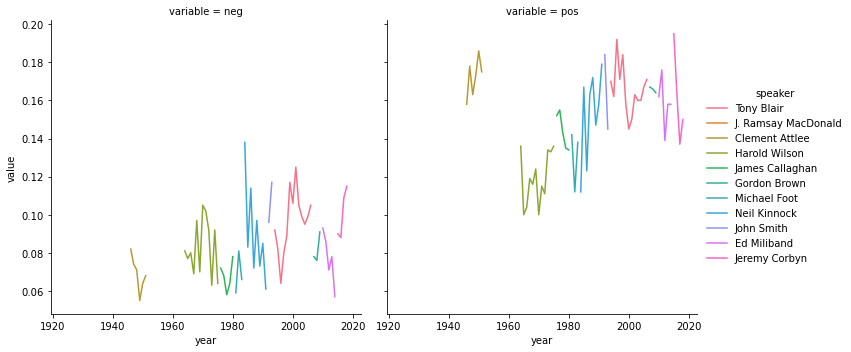

In [67]:
import seaborn as sns
g = sns.relplot(
    data = long_df[long_df["variable"].map(lambda x: x != "compound" and x != "neu")], 
    kind = "line", x = "year", y = "value", hue = "speaker", col = "variable", ci = None,
)
# g.set(xlim = (1980,2018))

Interesting that both Miliband and Brown were less negative in their party conference speeches as leader than Blair was - despite the perception of Brown and Miliband as somewhat 'grumpy'. Also interesting that Miliband's speech polarities are similar to those of Attlee - although there's not a great deal we can say with time differences that large.

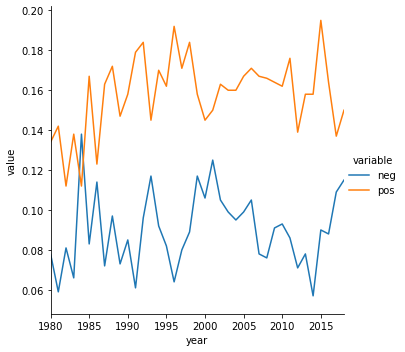

In [68]:
import seaborn as sns
g = sns.relplot(
    data = long_df[long_df["variable"].map(lambda x: x != "compound" and x != "neu")], 
    kind = "line", x = "year", y = "value", hue = "variable", ci = None,
)
g.set(xlim = (1980,2018))

Interesting that 1997 and 2001 - presumably pretty happy times for Labour party conference - were some of the most negative in terms of speech polarities. Also interesting that there's a spike in positive polarities before the 2015 Election - and then a sudden rise in negative polarity as we get towards 2018.

## TF-IDF

Another approach is to use 'Term Frequency - Inverse Document Frequency' (TF-IDF) - where we pick out the most distinctive words for each leader. First, we'll need to tidy, tokenize, and lemmatize the speeches.

In [71]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer 

stopwords = set(stopwords.words('english'))
WNL = WordNetLemmatizer()

def clean_text(text, case_sensitive = False, stop_words = True, lemma = True, join_words = " "):
    if not case_sensitive:
        text = text.lower()
    tokens = [x for x in wordpunct_tokenize(text) if x.isalpha()]
    if stop_words: 
        tokens = [word for word in tokens if word not in stopwords]
    if lemma: 
        tokens = [WNL.lemmatize(word,pos='v') for word in tokens]
    if join_words:
        return " ".join(tokens)
    else:
        return tokens

Then for each leader since Neil Kinnock, take all the speeches recorded in the dataframe (so not just leader's party conference speeches - but speeches as chancellor, or as foreign secretary, etc.) and apply the text cleaning function to them.

In [83]:
corbyn_speeches = labour_df[labour_df["speaker"] == "Jeremy Corbyn"]["content"].map(lambda x: clean_text(x))
miliband_speeches = labour_df[labour_df["speaker"] == "Ed Miliband"]["content"].map(lambda x: clean_text(x))
brown_speeches = labour_df[labour_df["speaker"] == "Gordon Brown"]["content"].map(lambda x: clean_text(x))
blair_speeches = labour_df[labour_df["speaker"] == "Tony Blair"]["content"].map(lambda x: clean_text(x))
smith_speeches = labour_df[labour_df["speaker"] == "John Smith"]["content"].map(lambda x: clean_text(x))
kinnock_speeches = labour_df[labour_df["speaker"] == "Neil Kinnock"]["content"].map(lambda x: clean_text(x))

Then define TF-IDF function:

In [141]:
def tfidf_for_speech(speech):
    wordmat = None
    wordlist = []
    
    vectorizer = TfidfVectorizer()
    wordmat = vectorizer.fit_transform(speech).todense()
    wordlist = vectorizer.get_feature_names()
    top_words = pd.Series(wordmat.sum(axis = 0).A1, index = wordlist)
    
    return top_words.sort_values(ascending=False)

In [139]:
tfidf_for_speech(corbyn_speeches)[0][:10]

people        1.168896
labour        1.114827
party         0.663248
government    0.533009
work          0.515569
country       0.512690
new           0.456784
make          0.437177
britain       0.417561
need          0.407066
dtype: float64

In [107]:
tfidf_for_speech(miliband_speeches)[:10]

people        1.224942
country       0.980851
britain       0.917637
say           0.858813
work          0.803731
get           0.703704
government    0.684483
go            0.641320
one           0.639900
labour        0.551076
dtype: float64

In [108]:
tfidf_for_speech(brown_speeches)[:10]

people     4.181293
britain    3.689201
new        3.621754
us         3.038476
labour     2.880619
work       2.407844
make       2.252300
world      2.210842
say        2.196583
party      2.182151
dtype: float64

In [109]:
tfidf_for_speech(blair_speeches)[:10]

people        4.696988
government    2.907740
new           2.884689
world         2.700915
us            2.363489
make          2.352371
one           2.300044
say           2.250040
work          2.208813
britain       2.200771
dtype: float64

In [120]:
tfidf_for_speech(smith_speeches)[:10]

people        0.713291
government    0.654278
labour        0.360298
work          0.360153
britain       0.287978
country       0.268669
need          0.267655
new           0.235980
applause      0.228696
right         0.209945
dtype: float64

In [121]:
tfidf_for_speech(kinnock_speeches)[:10]

people        2.073082
applause      1.324171
government    1.161959
make          1.156606
country       1.061284
get           0.907481
say           0.897771
go            0.856787
would         0.743147
us            0.739714
dtype: float64

We could compare this with, e.g. Thatcher's or Cameron's speeches - there's a lot of similarity here.

In [123]:
thatcher_speeches = speeches_df[speeches_df["speaker"] == "Margaret Thatcher"]["content"].map(lambda x: clean_text(x))
tfidf_for_speech(thatcher_speeches)[:10]

people        2.930645
government    2.408035
labour        2.249429
us            2.032295
party         2.002337
would         1.886701
britain       1.758586
say           1.663024
one           1.644864
make          1.471642
dtype: float64

In [122]:
cameron_speeches = speeches_df[speeches_df["speaker"] == "David Cameron"]["content"].map(lambda x: clean_text(x))
tfidf_for_speech(cameron_speeches)[:10]

people        3.980621
get           2.884375
country       2.572128
want          2.497146
government    2.275652
make          2.252603
say           2.168192
work          2.153407
need          1.997871
go            1.874193
dtype: float64

On the other hand, if we look at speeches from e.g. Clement Attlee vs. Harold Macmillan then there are much clearer differences.

In [124]:
attlee_speeches = speeches_df[speeches_df["speaker"] == "Clement Attlee"]["content"].map(lambda x: clean_text(x))
tfidf_for_speech(attlee_speeches)[:10]

great         1.214810
work          1.066551
government    0.858118
policy        0.796170
people        0.735670
party         0.599872
go            0.568587
parliament    0.540331
house         0.526962
say           0.525300
dtype: float64

In [126]:
macmillan_speeches = speeches_df[speeches_df["speaker"] == "Harold Macmillan"]["content"].map(lambda x: clean_text(x))
tfidf_for_speech(macmillan_speeches)[:10]

must            0.920788
world           0.724257
us              0.662098
new             0.608133
great           0.601409
make            0.567664
one             0.545962
people          0.538998
years           0.511586
commonwealth    0.508021
dtype: float64

By the time we get to Harold Wilson and Edward Heath, we start to see a similar sort of vocabulary emerge:

In [128]:
wilson_speeches = speeches_df[speeches_df["speaker"] == "Harold Wilson"]["content"].map(lambda x: clean_text(x))
tfidf_for_speech(wilson_speeches)[:10]

government    2.313531
britain       1.463449
labour        1.313124
party         1.280708
us            1.244707
years         1.216083
one           1.168778
would         1.167085
year          1.155086
industrial    1.106777
dtype: float64

In [129]:
heath_speeches = speeches_df[speeches_df["speaker"] == "Edward Heath"]["content"].map(lambda x: clean_text(x))
tfidf_for_speech(heath_speeches)[:10]

government    2.186487
us            1.559568
country       1.236638
people        1.221289
party         1.127935
say           1.019332
make          0.923843
go            0.920695
years         0.825320
world         0.815351
dtype: float64

At the moment this is pretty rough - plus each TF-IDF model is fitted on only that leader's own speeches, so to get a better sense of the differences between leaders it would be helpful to fit the model on _all_ the speeches and then extract TF-IDF scores for each leader's subset for the whole corpus. But it's still nice to see that we can do something with these speeches from [BPS.org](http://www.britishpoliticalspeech.org/speech-archive.htm).